# 06 - SHAP 기반 LSTM 피처 중요도 해석
LSTM 모델 예측에 기여한 센서 피처를 SHAP 기반으로 해석합니다.

In [11]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

⚠️ 참고: SHAP은 Tree 모델(XGBoost 등)에 최적화되어 있으며,  
딥러닝 모델(LSTM 등)에는 DeepExplainer 또는 GradientExplainer 사용이 권장됩니다.

In [12]:
import numpy as np

X_train = np.load('../models/X_lstm.npy')  # 또는 ./preprocessed/ 경로 등
y_train = np.load('../models/y_lstm.npy')

In [13]:

model = load_model('../models/lstm_model.h5')

In [17]:
X_last = X_train[:, -1, :]  

In [18]:
def predict_fn(x):
    # 2D → 3D 변환: (N, features) → (N, 30, features)
    # 동일한 타임스텝을 반복해서 30개로 맞춰줌
    x_repeat = np.repeat(x[:, np.newaxis, :], 30, axis=1)
    return model.predict(x_repeat)

In [19]:
explainer = shap.KernelExplainer(predict_fn, X_last[:100])
shap_values = explainer.shap_values(X_last[:10])

4/4 [==============================] - 0s 1ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

6494/6494 [==============================] - 7s 1ms/step


 10%|█         | 1/10 [00:08<01:20,  8.97s/it]

6494/6494 [==============================] - 7s 1ms/step


 20%|██        | 2/10 [00:17<01:08,  8.56s/it]

6494/6494 [==============================] - 7s 1ms/step


 30%|███       | 3/10 [00:25<00:58,  8.37s/it]

6494/6494 [==============================] - 7s 1ms/step


 40%|████      | 4/10 [00:33<00:50,  8.34s/it]

6494/6494 [==============================] - 7s 1ms/step


 50%|█████     | 5/10 [00:41<00:41,  8.27s/it]

6494/6494 [==============================] - 7s 1ms/step


 60%|██████    | 6/10 [00:50<00:33,  8.25s/it]

6494/6494 [==============================] - 7s 1ms/step


 70%|███████   | 7/10 [00:58<00:24,  8.28s/it]

6494/6494 [==============================] - 7s 1ms/step


 80%|████████  | 8/10 [01:06<00:16,  8.37s/it]

6494/6494 [==============================] - 7s 1ms/step


 90%|█████████ | 9/10 [01:15<00:08,  8.32s/it]

6494/6494 [==============================] - 7s 1ms/step


100%|██████████| 10/10 [01:23<00:00,  8.34s/it]


In [21]:
features = [
    'op1', 'op2',
    'sensor2', 'sensor3', 'sensor4',
    'sensor7', 'sensor8', 'sensor11', 'sensor12',
    'sensor13', 'sensor14', 'sensor15',
    'sensor17', 'sensor20', 'sensor21'
]

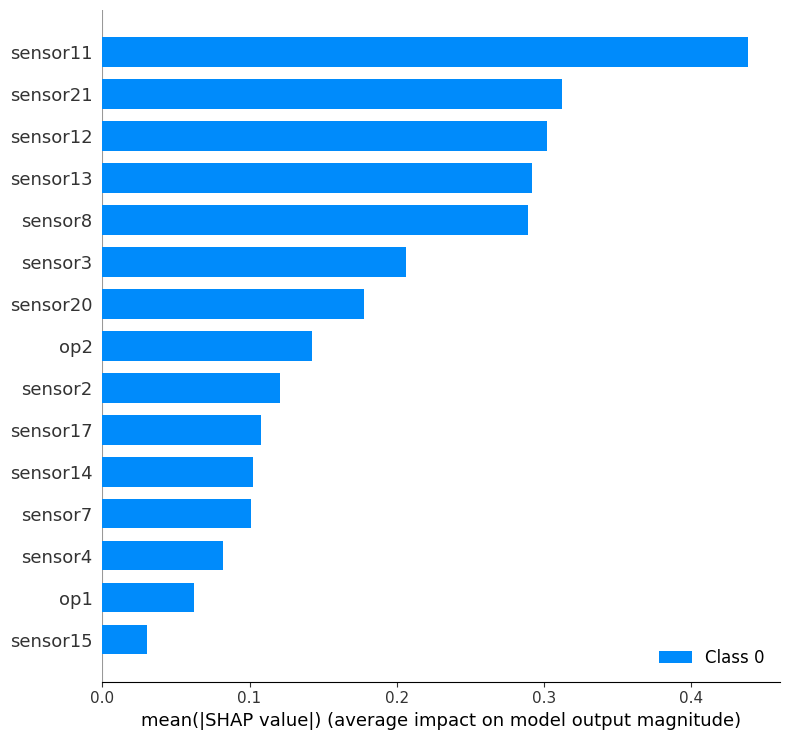

In [22]:
shap.summary_plot(shap_values, X_last[:10], feature_names=features, plot_type='bar')

sensor15 : LSTM 모델에서 영향도 거의  
op1, sensor4 : 중요도가 낮으며, 제거 대상 후보 가능성 있음
